# Alan Device Measurements 
This is the dilution measurements with rhodamine dye with the Alan Device on 12/15/2024

# Methods
# Testing Procedure

## Step 1
A YSI instrument was calibrated to be used to verify the chlorophyll water sample which would be prepared. Calibration information: https://www.ysi.com/file%20library/documents/manuals/exo-user-manual-web.pdf

## Step 2
A water sample was prepared with a chlorophyll concentration of 63.5 ug/L and an RFU of 15.8 RFU. This water sample was prepared with rhodamine dye and DI water

## Chlorophyll Sample Preparation
### Step 1
5mL of Rhodamine dye was pipetted into a 1000mL volumetric flask or beaker. Fill the flask or beaker up to 1000mL mark with DI water

### Step 2
Pipette 5mL of the prepared solution in step 1 into a separate 1000mL volumetric flask or beaker. Fill this flask or beaker up to 1000mL mark with DI water. This will be your chlorophyll water sample

### Step 3
Verify the concentration of the prepared chlorophyll water sample with the YSI

## Water Dilutions  
Create diluted water samples. From the 1000mL stock of 63.5 ug/L chlorophyll water sample prepare water samples diluted to: 50 ug/L, 40 ug/L, 30 ug/L, 20 ug/L, 10ug/L, 8 ug/L, 6 ug/L, 4 ug/L, 2 ug/L, 0.75 ug/L, 0.5 ug/L and 0.25ug/L. 

## Step 3
Once the diluted water samples are prepared begin testing procedure.

## Step 4
To begin tests, insert the device into the beaker of the dilution which you wish to measure. Cover the beaker with the device in it with a box.

## Step 5 
Begin continuous readings for 1 minute.

## Step 6
Stop readings. Transfer valeus to an excell spreadsheet.

## Step 7
Take out the device and rinse wirh DI water. 

## Step 8
Repeat these steps with the next diltuion concentration.


# Analysis 
This is the code for the analysis fo the dilution measurments taken on 12/13/2023 with the Alan Device. 

### Import modules and files 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Replace 'your_file.xlsx' with the path to your Excel file
file_path = "/Users/jessiewynne/chla_fluorometer/Alan_dilutions/alan dilutions 12.15.xlsx"

### Read in data and complete calculations

In [2]:
# Read data from Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Filter data for Measurement Numbers between 1 and 250
filtered_df = df[(df['Measurement Number'] >= 1) & (df['Measurement Number'] <= 250)]

# Calculate the average and standard deviation for each unique "ug/L" category
averages_df = filtered_df.groupby('ug/L')['Measurement Value'].agg(['mean', 'std']).reset_index()

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(averages_df['ug/L'], averages_df['mean'])


### Plot a figure with the mean valuse for each test catagorey, error bars based on one standard deviation, a line of best fit, R-squared and RMSE

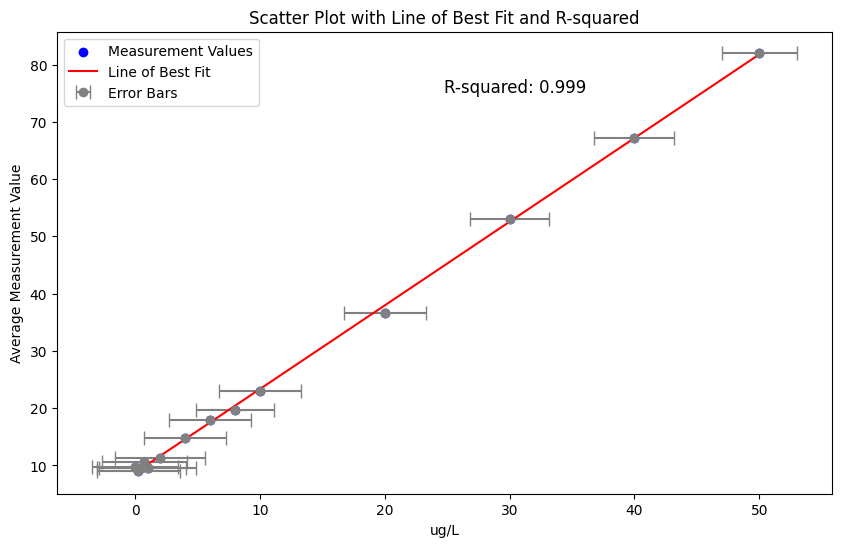

In [3]:
# Create a scatter plot with error bars
plt.figure(figsize=(10, 6))

# Plot the individual dots for averages in blue
plt.scatter(averages_df['ug/L'], averages_df['mean'], color='blue', label='Measurement Values')

# Plot the error bars in gray
plt.errorbar(averages_df['ug/L'], averages_df['mean'], xerr=averages_df['std'], fmt='o', color='gray', capsize=5, label='Error Bars')

# Plot the line of best fit in red
line_fit = intercept + slope * averages_df['ug/L']
plt.plot(averages_df['ug/L'], line_fit, color='red', label='Line of Best Fit')

# Display R-squared value on the plot
r_squared = r_value ** 2
plt.text(0.5, 0.9, f'R-squared: {r_squared:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.ylabel('Average Measurement Value')
plt.xlabel('ug/L')
plt.title('Scatter Plot with Line of Best Fit and R-squared')
plt.legend()
plt.show()